In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import math
from math import log10, floor
%matplotlib inline

In [2]:
#change the size of the visualisations to make them big and more readable
plt.rcParams['figure.figsize'] = (20, 10)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15

In [3]:
#display usernames in float format rather than scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [4]:
#function to convert json file to dataframe 
def convert_to_df(json):
    #convert json file to dataframe object
    df = pd.read_json(json)
    
    #create empty lists to be populated iteratively
    utc_time = []
    high = []
    low = []
    opn = []
    close = []
    #populate lists iteratively
    for i in range(len(df['Data']['Data'])):
        utc_time.append(df['Data']['Data'][i]['time'])
        high.append(df['Data']['Data'][i]['high'])
        low.append(df['Data']['Data'][i]['low'])
        opn.append(df['Data']['Data'][i]['open'])
        close.append(df['Data']['Data'][i]['close'])
    
    #create refined dataframe from these lists
    df = pd.DataFrame()
    df['time'] = utc_time
    df['high'] = high
    df['low'] = low
    df['open'] = opn
    df['close'] = close
    
    #convert time column from utc to YYYY-MM-DD
    df['time'] = pd.to_datetime(df['time'], unit='s')
    
    #set the index to time
    df = df.set_index('time')
    
    #return the dataframe
    return df

In [5]:
#function to create overall dataframes of all currencies for a given price type (high, low, open, close)
#and sort the columns in descending order of the highest value in each column
def create_overall(col, col_names):
    overall = pd.concat(col, axis = 1, join = 'inner')
    overall.columns = col_names
    
    #sort columns in dataframe in descending order of the highest value in each column
    overall = overall.loc[:, overall.max().sort_values(ascending=False).index]
    
    return overall

In [6]:
#list of currencies
currencies = ['BTC','ETH','XRP','BCH','ADA','LTC','XEM','XLM','EOS','NEO','MIOTA','DASH','XMR','TRX','XTZ','DOGE','ETC','VEN','USDT','BNB']

#create lists to store data for all currencies
high_cols = []
low_cols = []
open_cols = []
close_cols = []

#iteratively create dataframes for each cryptocurrency
for currency in currencies:
    #assign the name of the df (e.g. BTC_df) as a string to the df_name variable
    df_name = currency+'_df'
    #concatenate '.json' to the end of the currency so the json file can be read
    currency+='.json'
    #use vars to assign the dataframe to the name of the dataframe
    vars()[df_name] = convert_to_df(currency)
    #append each column to overall lists
    high_cols.append(vars()[df_name].high)
    low_cols.append(vars()[df_name].low)
    open_cols.append(vars()[df_name].open)
    close_cols.append(vars()[df_name].close)

#create overall dataframes for the high, low, open and close prices of all currencies
#and sort the columns in descending order of the highest value in each column
overall_high = create_overall(high_cols, currencies)
overall_low = create_overall(low_cols, currencies)
overall_open = create_overall(open_cols, currencies)
overall_close = create_overall(close_cols, currencies)

RQ3

<AxesSubplot:xlabel='time'>

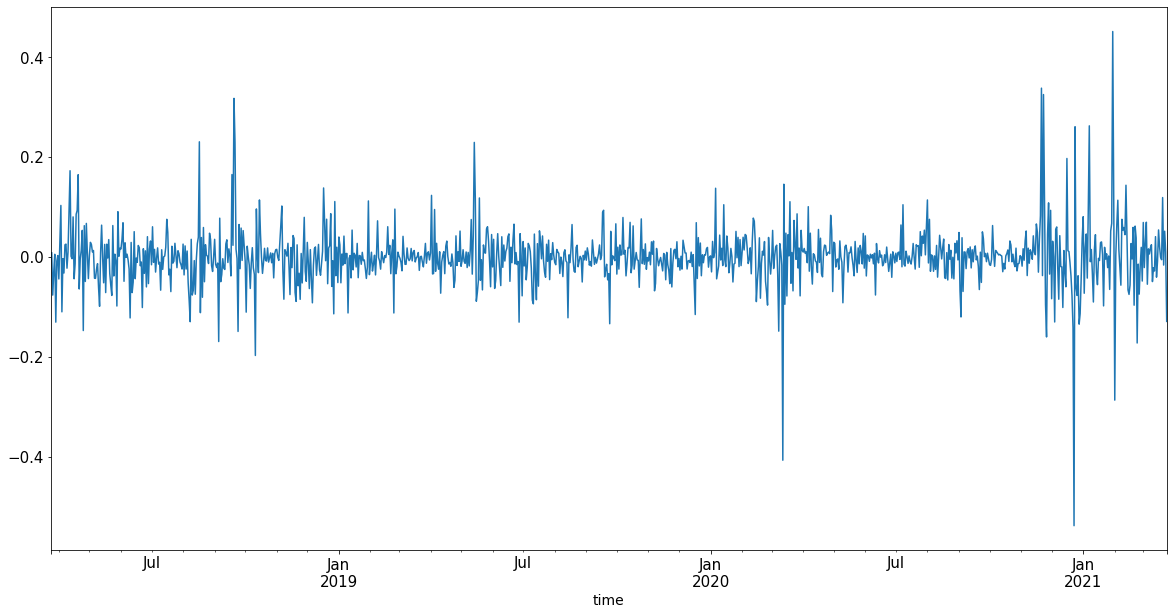

In [7]:
def calculate_log_returns(data):
    
    return np.log(data["close"]) - np.log(data["close"].shift(1))

test = calculate_log_returns(XRP_df)
test.plot()

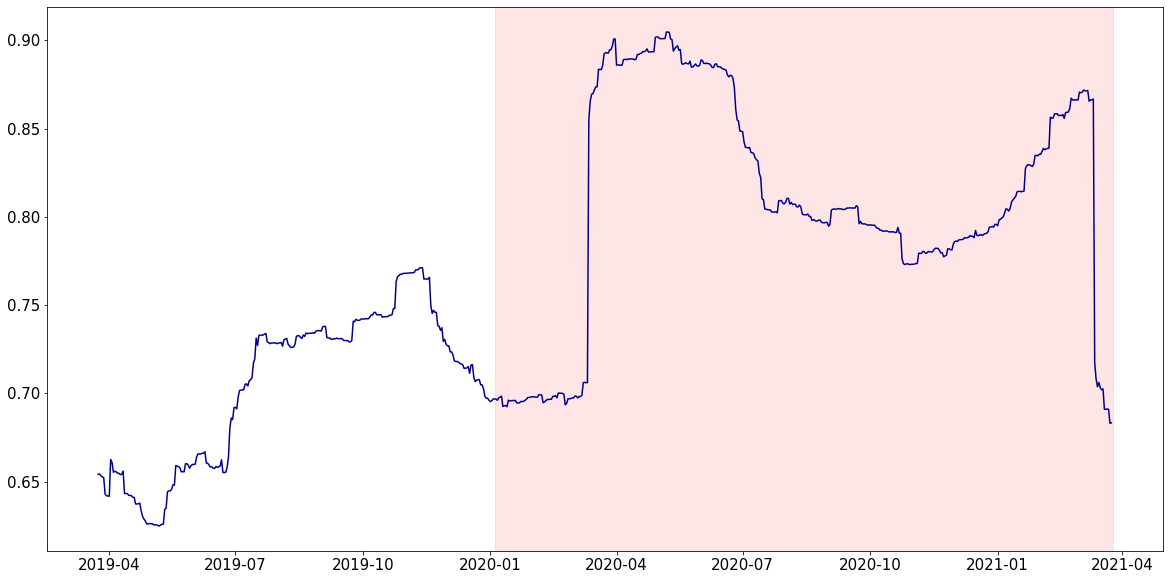

<AxesSubplot:xlabel='time'>

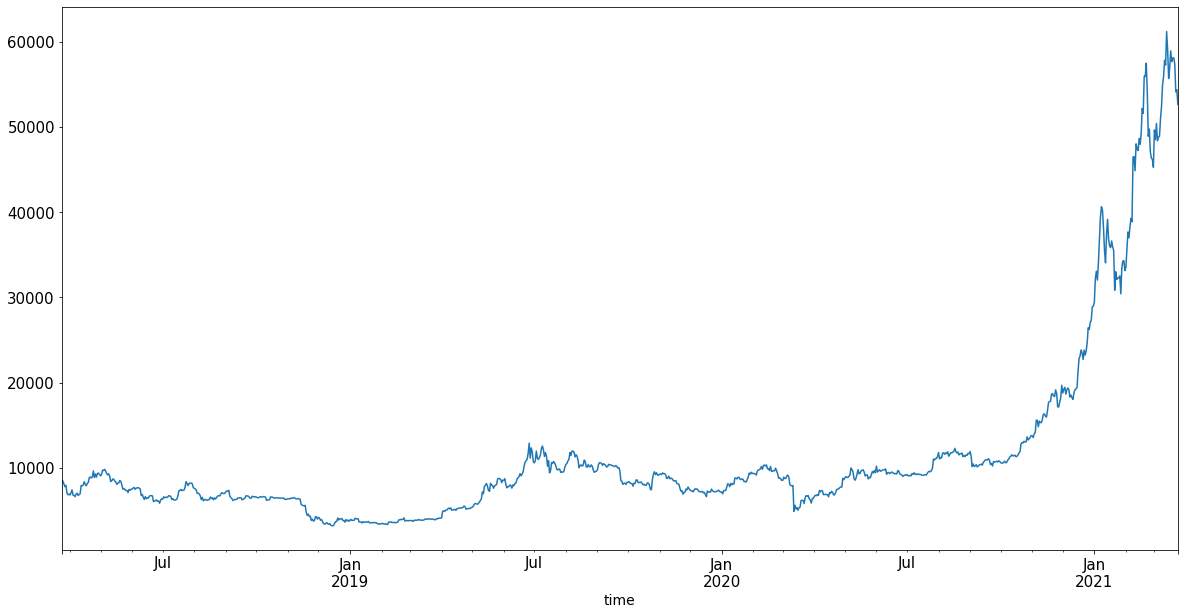

In [8]:
def plot_volatility(data, period=365, highlightCovid=False,start="2020-01-04",end="2021-03-25"):

    #fig, ax = plt.subplots(figsize=(20,15))
    
    
    
    returns = np.log(data['close'] / data['close'].shift(1))
    volatility = returns.rolling(window=period).std()*np.sqrt(period)
    
    plt.plot(volatility, color = 'darkBlue')

    if (highlightCovid):
        plt.axvspan(start, end, color='red', alpha=.1)

    plt.show()
    
    

plot_volatility(BTC_df,highlightCovid=True)
BTC_df["close"].plot()

In [9]:
url = "https://data.cdc.gov/resource/r8kw-7aab.json"

import urllib.request
try:
    response = urllib.request.urlopen(url)
    raw_json = response.read().decode("utf-8")
except:
    print("Failed to retrieve url: %s" % url)

In [10]:
import json
data = json.loads(raw_json)

In [11]:
fout = open("covid_data.json","w")
fout.write(raw_json)
fout.close()

In [12]:
import pandas as pd
fin = open("covid_data.json","r")
covid_df = pd.read_json(fin)
fin.close()
covid_df.head(1)

,data_as_of,start_date,end_date,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
0,2021-05-06T00:00:00.000,2019-12-29T00:00:00.000,2020-01-04T00:00:00.000,By Week,2019/2020,1,2020-01-04T00:00:00.000,United States,1.0000,60171.0000,98,4105.0000,1.0000,434.0000,4539.0000,NaN


In [13]:
import datetime

covid_df["end_date"] = pd.to_datetime(covid_df["end_date"])
test = covid_df[["end_date","covid_19_deaths"]]
test = test.sort_values("end_date")
test = test.set_index("end_date")
test = test.dropna()

In [14]:
test

,covid_19_deaths
end_date,
2020-01-04,1.0000
2020-01-04,0.0000
2020-01-04,0.0000
2020-01-04,0.0000
2020-01-04,0.0000
...,...
2021-05-01,121.0000
2021-05-01,1487.0000
2021-05-01,23.0000


In [15]:
#Returns 2 dataframes - before covid and during covid
def separate_covid_period(data,start="2020-01-04",end="2021-03-25"):
    
    covid = data.loc[data.index >= start]
    covid = covid.loc[covid.index <= end]
    
    beforeCovid = data.loc[data.index < start]
    
    return beforeCovid, covid


In [16]:
bf,c = separate_covid_period(BTC_df)

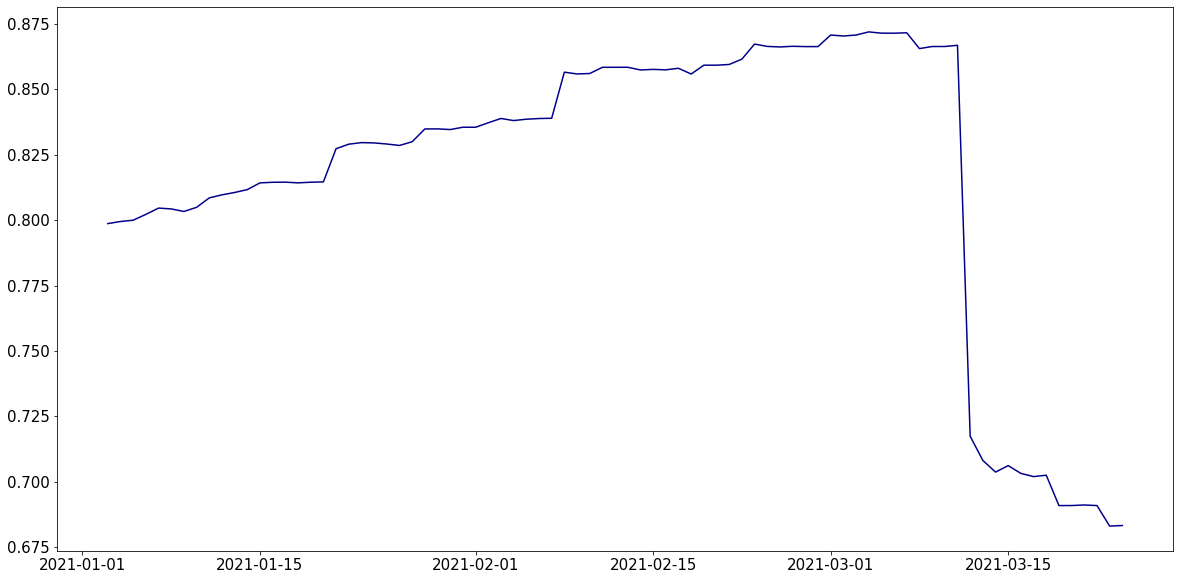

In [17]:
plot_volatility(c)

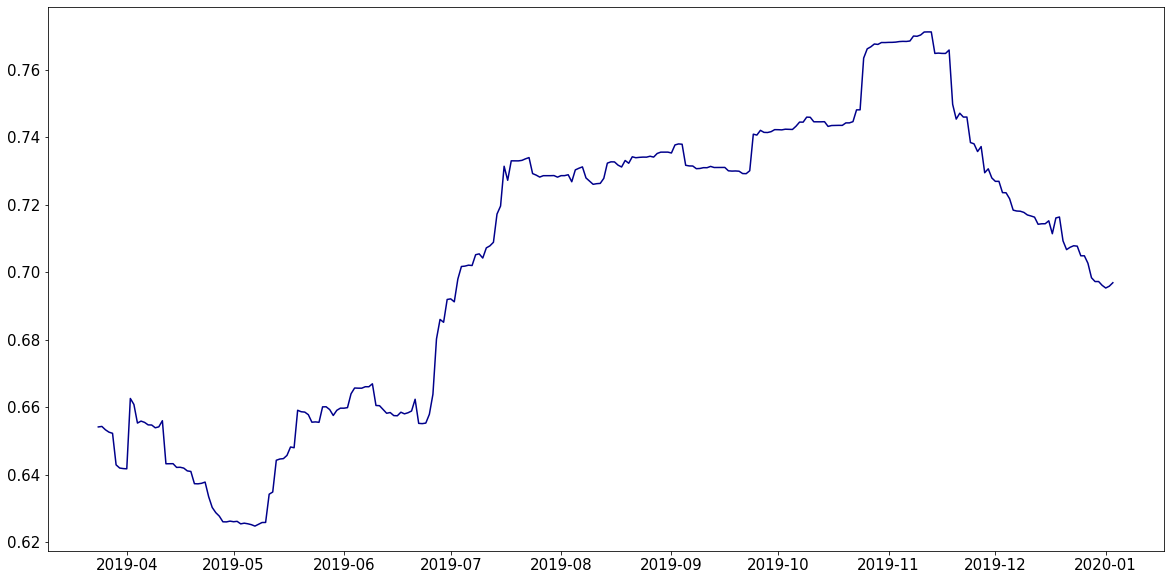

In [18]:
plot_volatility(bf)

In [19]:
import datetime

covid_df["end_date"] = pd.to_datetime(covid_df["end_date"])
test = covid_df[["end_date","covid_19_deaths"]]
test = test.sort_values("end_date")
test = test.dropna()
test = test.groupby("end_date")
#test = test.set_index("end_date")


In [20]:
t = test.sum()

<AxesSubplot:xlabel='end_date'>

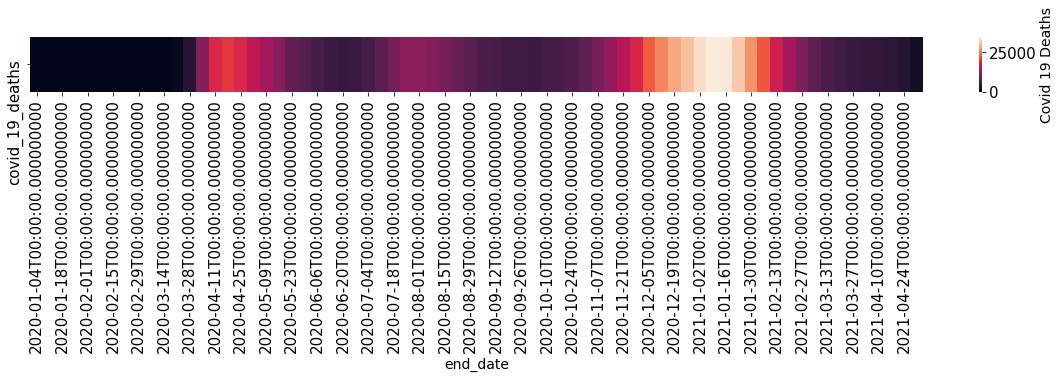

In [21]:
import seaborn as sns


fig, ax = plt.subplots(figsize=(20,1))


sns.heatmap(t.pivot_table(columns='end_date', values='covid_19_deaths'), 
                             cbar_kws={'label': 'Covid 19 Deaths'},ax=ax)

In [22]:
covid_df.tail()

,data_as_of,start_date,end_date,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
995,2021-05-06T00:00:00.000,2020-04-12T00:00:00.000,2020-04-18,By Week,2020,16,2020-04-18T00:00:00.000,Illinois,590.0000,2912.0000,145,505.0000,324.0000,nan,776.0000,One or more data cells have counts between 1-9...
996,2021-05-06T00:00:00.000,2020-04-19T00:00:00.000,2020-04-25,By Week,2020,17,2020-04-25T00:00:00.000,Illinois,677.0000,3010.0000,150,459.0000,326.0000,nan,811.0000,One or more data cells have counts between 1-9...
997,2021-05-06T00:00:00.000,2020-04-26T00:00:00.000,2020-05-02,By Week,2020,18,2020-05-02T00:00:00.000,Illinois,741.0000,2952.0000,146,530.0000,377.0000,0.0000,894.0000,NaN
998,2021-05-06T00:00:00.000,2020-05-03T00:00:00.000,2020-05-09,By Week,2020,19,2020-05-09T00:00:00.000,Illinois,789.0000,2962.0000,152,528.0000,398.0000,0.0000,919.0000,NaN
999,2021-05-06T00:00:00.000,2020-05-10T00:00:00.000,2020-05-16,By Week,2020,20,2020-05-16T00:00:00.000,Illinois,699.0000,2865.0000,145,434.0000,318.0000,nan,817.0000,One or more data cells have counts between 1-9...


In [23]:
overall_high.loc['2020-01-04':'2021-04-17'].iloc[::7, :]

,BTC,ETH,BCH,DASH,BNB,XMR,LTC,NEO,ETC,VEN,EOS,XTZ,MIOTA,USDT,ADA,XEM,XRP,XLM,TRX,DOGE
time,,,,,,,,,,,,,,,,,,,,
2020-01-04,7405.7500,136.5600,227.3700,47.5400,13.8800,51.4400,43.0500,9.1200,4.7770,3.0240,2.6880,1.2870,0.1738,1.0070,0.0357,0.0335,0.1937,0.0458,0.0142,0.0021
2020-01-11,8287.4200,144.8400,278.8900,66.5600,14.9900,63.2000,51.1500,9.8070,5.8190,3.2980,3.1280,1.3470,0.1946,1.0330,0.0392,0.0347,0.2199,0.0495,0.0156,0.0023
2020-01-18,8974.6500,179.5200,403.9400,116.3600,18.2700,70.9700,62.3100,12.1200,9.8150,3.6620,3.9970,1.5470,0.2542,1.0060,0.0460,0.0408,0.2546,0.0662,0.0183,0.0026
2020-01-25,8444.3200,161.5800,316.8100,102.9900,18.8000,62.0100,54.4100,10.4300,8.5970,3.4300,3.6360,1.5140,0.2364,1.0120,0.0459,0.0406,0.2225,0.0571,0.0169,0.0024
2020-02-01,9455.9200,186.0900,386.6400,118.9000,18.4700,73.9300,72.6500,11.7400,11.8700,3.8570,4.2650,1.7490,0.3037,1.0070,0.0571,0.0503,0.2429,0.0625,0.0191,0.0025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-20,57528.1600,2038.5200,748.1800,333.2800,334.6200,286.8800,246.9200,49.9300,17.5700,22.9800,5.4480,5.1440,1.5550,1.0300,1.1970,0.5554,0.5824,0.5331,0.0635,0.0606
2021-02-27,48362.8000,1526.9300,501.6900,223.9400,228.7400,217.4200,180.4100,38.3800,11.5200,18.9800,3.8410,3.8580,1.2300,1.0490,1.4840,0.5984,0.4585,0.4700,0.0483,0.0520
2021-03-06,49185.3200,1670.5600,505.1600,211.4100,231.9000,208.4800,184.6800,38.6400,11.2700,20.0900,3.7720,4.0100,1.3510,1.0070,1.1830,0.8327,0.4706,0.4085,0.0508,0.0526


In [24]:
len(covid_df)

1000

In [25]:
covid_df[(covid_df['state'] == 'United States') & (covid_df['end_date'] < '2021-03-21')].sort_values(by=['end_date'])

,data_as_of,start_date,end_date,group,year,mmwr_week,week_ending_date,state,covid_19_deaths,total_deaths,percent_of_expected_deaths,pneumonia_deaths,pneumonia_and_covid_19_deaths,influenza_deaths,pneumonia_influenza_or_covid_19_deaths,footnote
0,2021-05-06T00:00:00.000,2019-12-29T00:00:00.000,2020-01-04,By Week,2019/2020,1,2020-01-04T00:00:00.000,United States,1.0000,60171.0000,98,4105.0000,1.0000,434.0000,4539.0000,NaN
1,2021-05-06T00:00:00.000,2020-01-05T00:00:00.000,2020-01-11,By Week,2020,2,2020-01-11T00:00:00.000,United States,0.0000,60725.0000,97,4152.0000,0.0000,473.0000,4625.0000,NaN
2,2021-05-06T00:00:00.000,2020-01-12T00:00:00.000,2020-01-18,By Week,2020,3,2020-01-18T00:00:00.000,United States,3.0000,59353.0000,97,4064.0000,2.0000,467.0000,4532.0000,NaN
3,2021-05-06T00:00:00.000,2020-01-19T00:00:00.000,2020-01-25,By Week,2020,4,2020-01-25T00:00:00.000,United States,2.0000,59154.0000,99,3918.0000,0.0000,499.0000,4419.0000,NaN
4,2021-05-06T00:00:00.000,2020-01-26T00:00:00.000,2020-02-01,By Week,2020,5,2020-02-01T00:00:00.000,United States,0.0000,58822.0000,99,3817.0000,0.0000,481.0000,4298.0000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2021-05-06T00:00:00.000,2021-02-14T00:00:00.000,2021-02-20,By Week,2021,7,2021-02-20T00:00:00.000,United States,10240.0000,66198.0000,112,8538.0000,5639.0000,15.0000,13152.0000,NaN
60,2021-05-06T00:00:00.000,2021-02-21T00:00:00.000,2021-02-27,By Week,2021,8,2021-02-27T00:00:00.000,United States,8179.0000,63382.0000,109,7182.0000,4435.0000,19.0000,10937.0000,NaN
61,2021-05-06T00:00:00.000,2021-02-28T00:00:00.000,2021-03-06,By Week,2021,9,2021-03-06T00:00:00.000,United States,6368.0000,60140.0000,105,6221.0000,3472.0000,25.0000,9134.0000,NaN
62,2021-05-06T00:00:00.000,2021-03-07T00:00:00.000,2021-03-13,By Week,2021,10,2021-03-13T00:00:00.000,United States,5341.0000,58145.0000,101,5424.0000,2868.0000,13.0000,7906.0000,NaN


In [26]:
#function that returns dataframe from the covid_df where the rows are weekly COVID-19 deaths in the USA
def national_covid_deaths():
    df = covid_df[(covid_df['state'] == 'United States') & (covid_df['end_date'] < '2021-03-21')].sort_values(by=['end_date'])
    df = df.set_index('end_date')
    return df['covid_19_deaths']

In [27]:
national_covid_deaths()

end_date
2020-01-04       1.0000
2020-01-11       0.0000
2020-01-18       3.0000
2020-01-25       2.0000
2020-02-01       0.0000
                ...    
2021-02-20   10240.0000
2021-02-27    8179.0000
2021-03-06    6368.0000
2021-03-13    5341.0000
2021-03-20    4534.0000
Name: covid_19_deaths, Length: 64, dtype: float64

In [28]:
#function to create dataframe that contains data from the dates
#during which covid occurred
def df_during_covid(df):
    return df[df.index.isin(national_covid_deaths().index)]

In [29]:
#function to create dataframe that contains data from the dates
#before covid occurred
def df_pre_covid(df):
    return df.loc['2018-03-24':'2020-01-03'].iloc[::7, :].tail(len(df_during_covid(df)))

In [30]:
#function to create data frame with columns for share prices before and during covid
#and in the case of Bitcoin, a column showing the number of covid deaths
def compare_pre_during_covid(price_type, curr):
    df = pd.DataFrame()
    df['Pre Covid'] = list(df_pre_covid(price_type)[curr].reset_index(drop=True))
    df['During Covid'] = list(df_during_covid(price_type)[curr].reset_index(drop=True))
    #because covid death numbers were as high as 25000, the only currency with which
    #it can compare on the same axes is Bitcoin
    if curr == 'BTC':
        df['USA Covid Deaths'] = list(national_covid_deaths())
    return df

In [31]:
#function to create dataframe with percentage changes as values
def to_pct_change(df):
    pct_change = df.pct_change()
    return pct_change.dropna()

In [32]:
#interactive function that visualises share prices of cryptocurrencies before and during covid
def pre_vs_during_interactive(df, curr, pct_change):
    price_type = df.replace('overall_', '').title()
    
    if pct_change:
        to_plot = to_pct_change(compare_pre_during_covid(eval(df), curr))
        title = f'Percentage Change of {price_type} Share Price of {curr} Before and During Covid-19 in the USA'
    else:
        to_plot = compare_pre_during_covid(eval(df), curr)
        title = f'{price_type} Share Price of {curr} Before and During Covid-19 in the USA'
        
    to_plot.plot()
    plt.title(title, fontsize=20)
    plt.show()

In [33]:
interact(pre_vs_during_interactive, df = ['overall_high', 'overall_low', 'overall_open', 'overall_close'],
        curr= currencies, pct_change=False)

interactive(children=(Dropdown(description='df', options=('overall_high', 'overall_low', 'overall_open', 'over…

<function __main__.pre_vs_during_interactive(df, curr, pct_change)>

Below are some plots that were planned to be used in the final presentation/report and they are seperate from the interactive plots so that the figures could be saved as png files

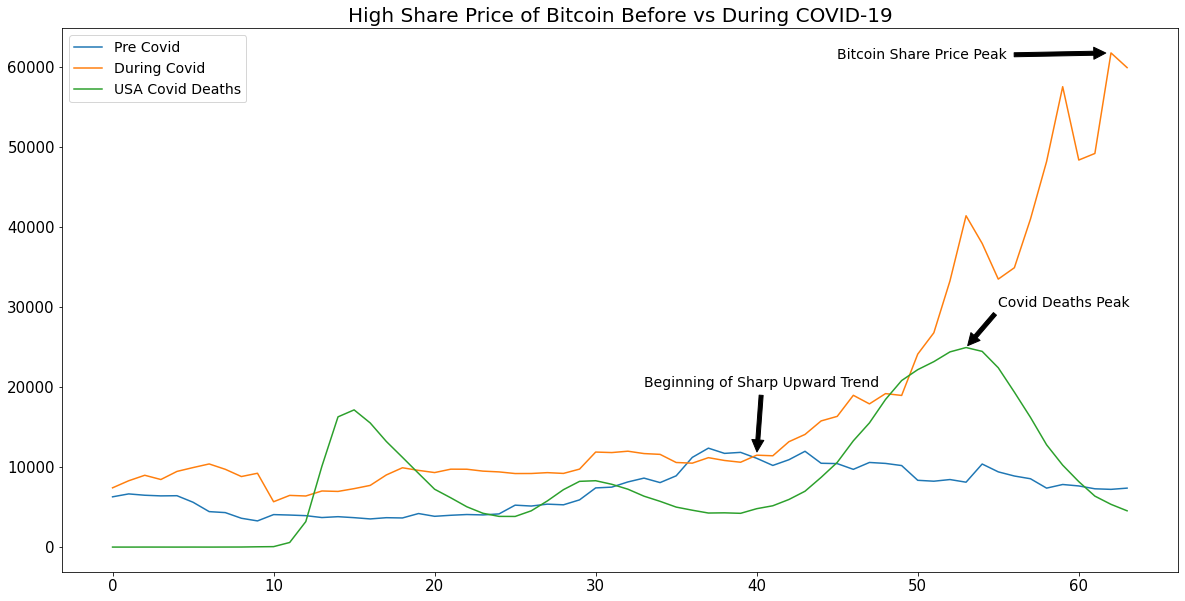

In [34]:
compare_pre_during_covid(overall_high, 'BTC').plot()
plt.title('High Share Price of Bitcoin Before vs During COVID-19')
plt.annotate(f'Beginning of Sharp Upward Trend', xy=(40,df_during_covid(overall_high)['BTC'].iloc[40]), xytext=(33,20000),
        arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'Covid Deaths Peak', xy=(53,compare_pre_during_covid(overall_high, 'BTC')['USA Covid Deaths'].max()),
        xytext=(55,30000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'Bitcoin Share Price Peak', xy=(62,compare_pre_during_covid(overall_high, 'BTC')['During Covid'].max()),
        xytext=(45,61000), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.savefig('BTC_Pre_vs_During_Covid.png', bbox_inches='tight')
plt.show()

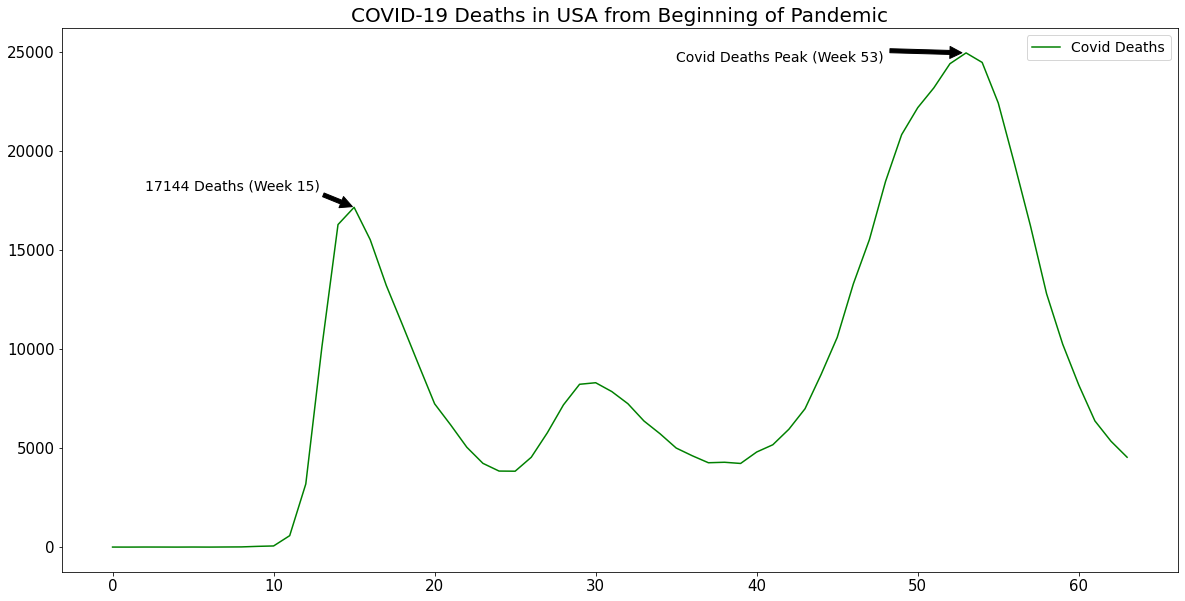

In [35]:
df = pd.DataFrame()
df['Covid Deaths'] = list(national_covid_deaths())
df.plot(color='g')
plt.annotate(f'Covid Deaths Peak (Week 53)', xy=(53,df['Covid Deaths'].max()),
    xytext=(35,24500), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'{int(df.loc[0:20].max())} Deaths (Week 15)', xy=(15,df.loc[0:20].max()),
    xytext=(2,18000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.title('COVID-19 Deaths in USA from Beginning of Pandemic')
#plt.savefig('USA_Covid_Deaths.png', bbox_inches='tight')
plt.show()

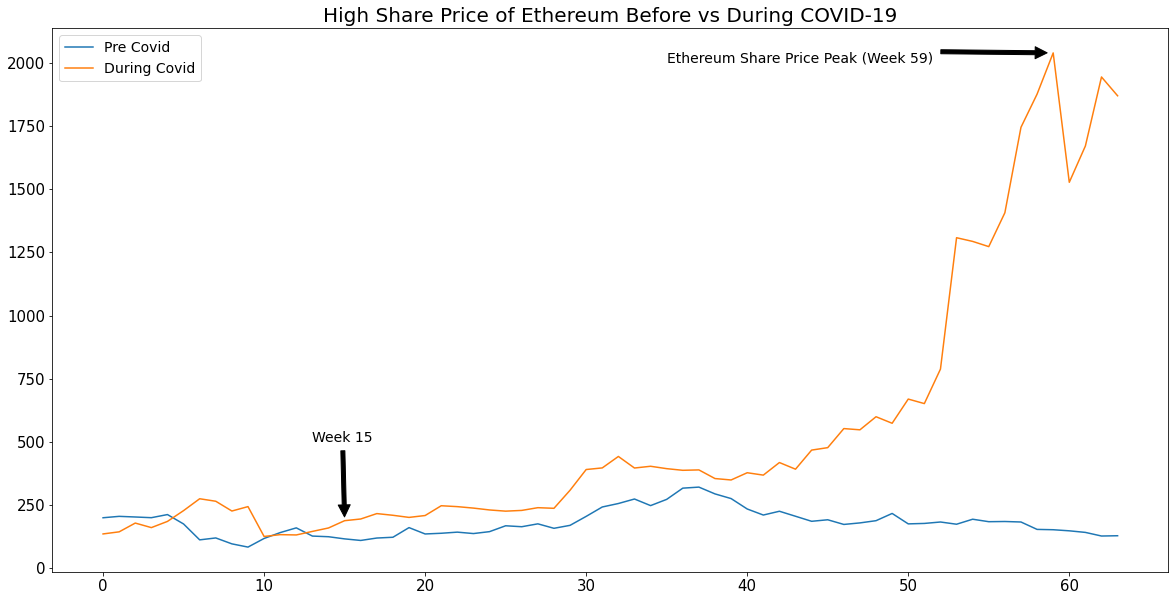

In [36]:
compare_pre_during_covid(overall_high, 'ETH').plot()
plt.title('High Share Price of Ethereum Before vs During COVID-19')
plt.annotate(f'Ethereum Share Price Peak (Week 59)', xy=(59,compare_pre_during_covid(overall_high, 'ETH')['During Covid'].max()),
    xytext=(35,2000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'Week 15', xy=(15,compare_pre_during_covid(overall_high, 'ETH')['During Covid'].loc[15]),
    xytext=(13,500), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.savefig('ETH_Pre_vs_During_Covid.png', bbox_inches='tight')
plt.show()

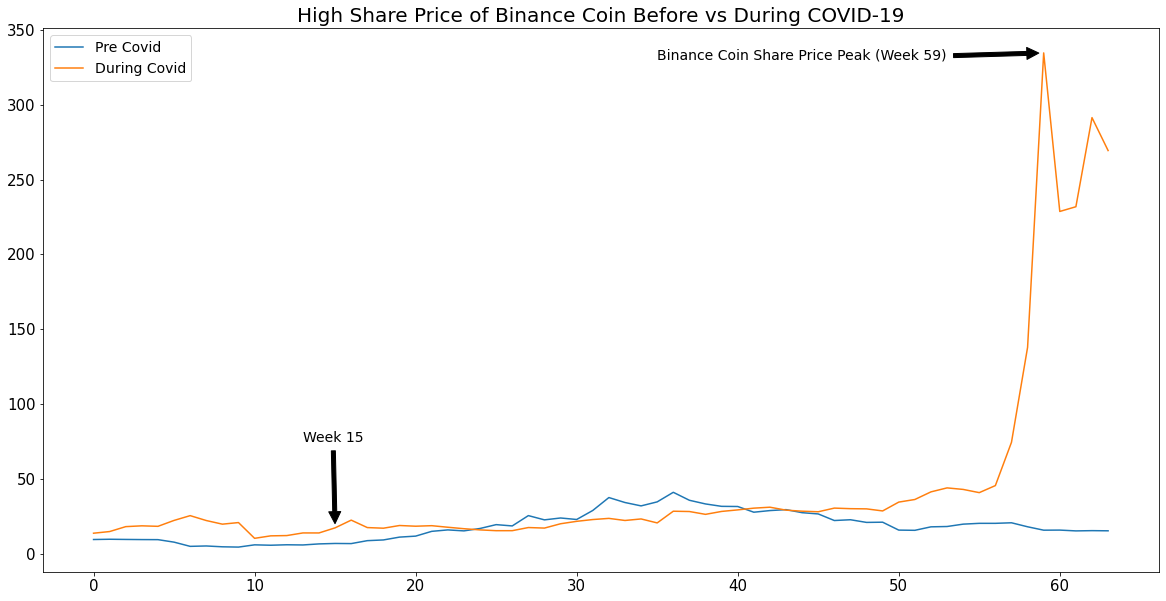

In [37]:
compare_pre_during_covid(overall_high, 'BNB').plot()
plt.title('High Share Price of Binance Coin Before vs During COVID-19')
plt.annotate(f'Binance Coin Share Price Peak (Week 59)', xy=(59,compare_pre_during_covid(overall_high, 'BNB')['During Covid'].max()),
    xytext=(35,330), arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate(f'Week 15', xy=(15,compare_pre_during_covid(overall_high, 'BNB')['During Covid'].loc[15]),
    xytext=(13,75), arrowprops=dict(facecolor='black', shrink=0.05))
#plt.savefig('BNB_Pre_vs_During_Covid.png', bbox_inches='tight')
plt.show()

In [38]:
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'json',
 'pandas',
 'numpy',
 'matplotlib.pyplot',
 'math',
 'urllib',
 'datetime',
 'seaborn',
 'types']